# Perceptron

Answer all marked questions (❓).  

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
%matplotlib inline

## Question 1

Consider the following linearly separable training set:

$\mathbf{x^{(1)}} =\begin{bmatrix} -1 \\ 0  \\ \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 0 \\ 0.25  \\ \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 1 \\ -1  \\ \end{bmatrix} $

$y^{(1)} = -1$, $y^{(2)} = +1$, $y^{(3)} = +1$, $y^{(4)} = -1$


In [96]:
# Define points
inputs = np.array([[-1, 0], [0, 0.25], [1, 1], [1, -1]])
labels = np.array([-1, 1, 1, -1])

num_examples, num_features = np.shape(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(np.shape(inputs))

(4, 3)


❓ Let us use the perceptron algorithm to separate the two classes of points.

1. Initialize all weights to zero (including the bias) 
2. Assume $sign(z) = +1$ iff $z ≥ 0$, and $−1$ if $z < 0$ 
3. Complete provided fucntion `perceptron_epoch` which performs one epoch of the perceptron algorithm
4. Use a learning rate of one
5. Apply algorithm until convergence 

Note: You can use provided function `plot_separation_line` to see the points and the separating hyperplane in each epoch

In [97]:
"""
Function to execute perceptron epoch. 

Receives inputs, labels, previous weights (w) and learning rate(eta)

Should output number of mistakes and new weights
"""

def perceptron_epoch(inputs, labels, w, eta):
    mistakes = 0
    for i in range(num_examples):
        x = inputs[i]
        y = labels[i]
        yhat = 1 if w@x >= 0 else -1
        if(yhat != y):
            mistakes += 1
            w = w + eta*y*x
    print("Mistakes: %d" % mistakes)
    return mistakes, w

In [98]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == -1, 1], inputs[labels == -1, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    # Plot model separation line.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

Mistakes: 3
[-1.    0.    1.25]


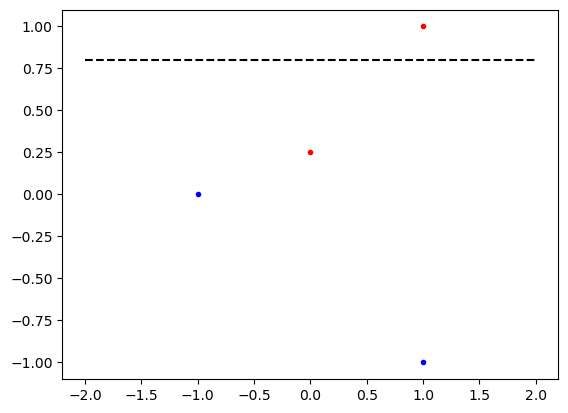

Mistakes: 1
[0.  0.  1.5]


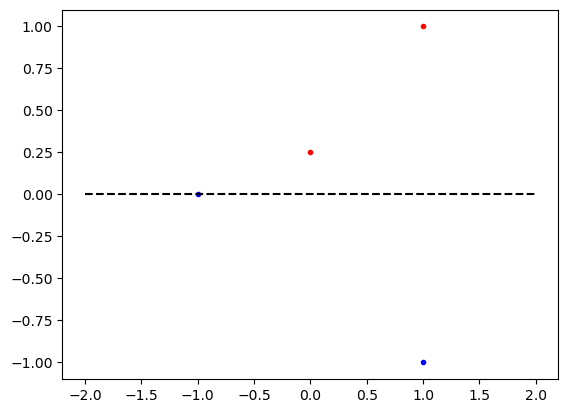

Mistakes: 2
[0.   1.   1.75]


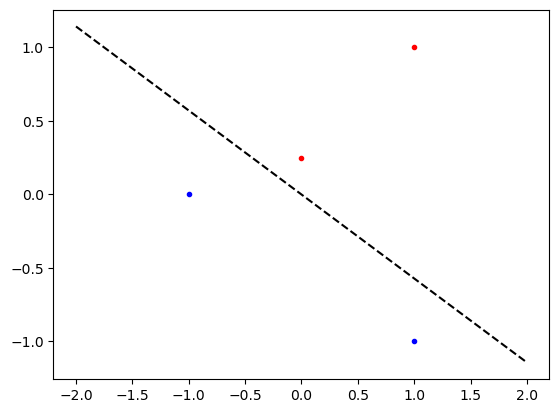

Mistakes: 0
[0.   1.   1.75]


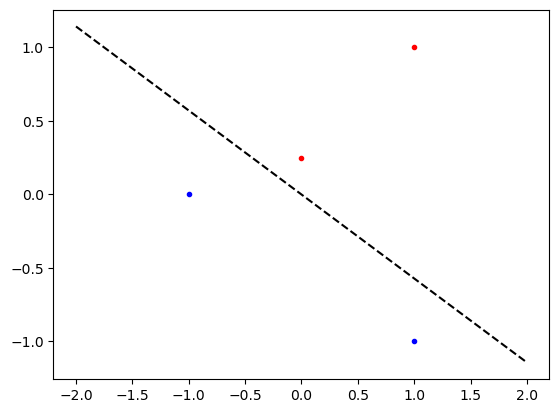

In [99]:
w = np.zeros(num_features + 1)
mistakes = 1
while(mistakes != 0):
    mistakes, w = perceptron_epoch(inputs, labels, w, 1)
    print(w)
    plot_separation_line(inputs, labels, w)

❓ What is the perceptron output for query point $\begin{bmatrix} 0 && 1   \end{bmatrix}^T$?

In [100]:
y_query = w@np.array([1, 0, 1])
y_query = 1 if y_query >= 0 else -1
y_query

1

❓ Change the initialization of weights and biases to be random with a standard normal distribution $\mathcal{N}(0,1)$. Try multiple times. Does it always converge?

*Hint:* `np.random.randn`

Mistakes: 3
[-0.26123599 -1.67689481  1.80295594]
Mistakes: 2
[-0.26123599 -0.67689481  2.05295594]
Mistakes: 2
[-0.26123599  0.32310519  2.30295594]
Mistakes: 0
[-0.26123599  0.32310519  2.30295594]


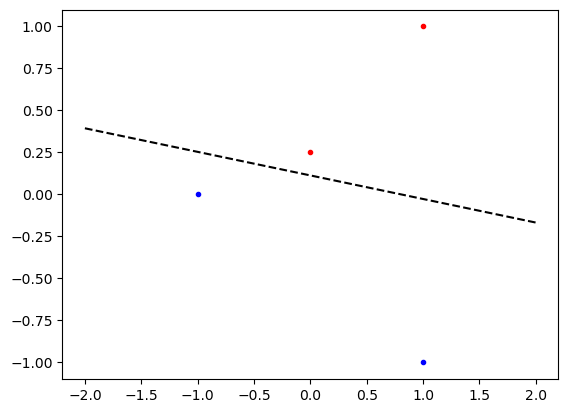

In [101]:
w = np.random.randn(num_features + 1)
mistakes = 1
while(mistakes != 0):
    mistakes, w = perceptron_epoch(inputs, labels, w, 1)
    print(w)
plot_separation_line(inputs, labels, w)


## Question 2 

Let us generate a balanced dataset with 30 examples in $\mathbb{R}^2$ and 3 classes. 
Assume each of the 10 inputs associated to class $k \in \{0,1,2\}$ is generated as $x \sim \mathcal{N}(\mu_k, \sigma_k^2 I)$, with $\sigma_0=\sigma_1=\sigma_2 = 1$, 
$\mu_0 = [0, 0]^\top$, $\mu_1 = [0, 3]^\top$, and $\mu_2 = [2, 2]^\top$.

❓ Plot the data

In [102]:
inputs0 = np.array([0, 0]) + np.random.randn(10, 2)
inputs1 = np.array([0, 3]) + np.random.randn(10, 2)
inputs2 = np.array([2, 2]) + np.random.randn(10, 2)
inputs = np.concatenate([inputs0, inputs1, inputs2], axis=0)

labels = np.array([0]*10 + [1]*10 + [2]*10)

# Shuffling observations
ind = np.random.permutation(30)
inputs = inputs[ind, :]
labels = labels[ind]

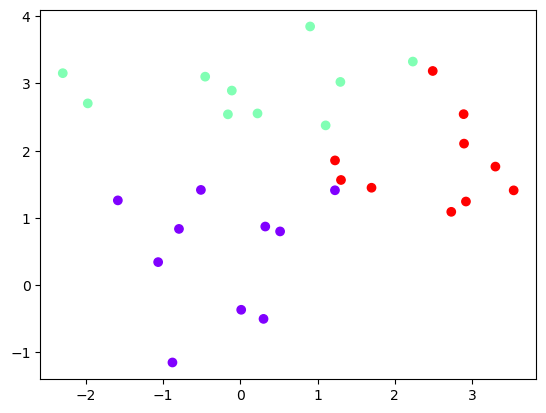

In [103]:
plt.scatter(inputs[:,0], inputs[:,1], c=labels, cmap='rainbow')

❓ Implement the multi-class perceptron algorithm by completing the `multi_class_perceptron_epoch` function. 

❓ Complete function `multi_class_classify` so that it provides the predicted labels given the inputs and the weights.

❓ Create or import a function that computes accuracy given the arrays of predicted and correct labels.

❓ Run 100 iterations of the algorithm, initializing all the weights to zero and using a learning rate of one. Save the accuracy of each epoch in a list. 

❓ What is the training accuracy (fraction of points that are correctly classified)?

❓ Plot the accuracies over epochs.

Note: Don't forget you have to augment the `inputs` with a dimension for the bias!

In [104]:
def multi_class_perceptron_epoch(inputs, labels, W, eta=1):
    mistakes = 0
    for x, y in zip(inputs, labels):
        yhat = np.argmax(W@x)
        if(yhat != y):
            mistakes += 1
            W[y, :] += eta * x
            W[yhat, :] -= eta * x
    #print("Mistakes: %d" % mistakes)
    return W

In [105]:
def multi_class_classify(inputs, W):
    predicted_labels = []
    for x in inputs:
        y_hat = np.argmax(W.dot(x))
        predicted_labels.append(y_hat)
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

In [106]:
def accuracy(labels, predicted_labels):
    return np.mean(labels == predicted_labels)

    #Pode se fazer isto também
    # x = 0
    # for i in range(labels.shape[0]):
    #     if(labels[i] == predicted_labels[i]):
    #         x +=1
    # x = x/labels.shape[0]
    # return x

In [107]:
#BIAS
inputs = np.concatenate([np.ones((inputs.shape[0],1)), inputs], axis=1)

0.9


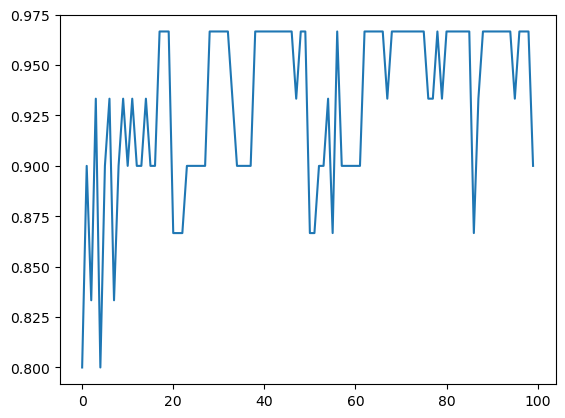

In [108]:
num_labels = len(np.unique(labels))
num_features = inputs.shape[1]
w = np.zeros((num_labels, num_features))
acc = []
for i in range(100):
    w = multi_class_perceptron_epoch(inputs, labels, w, 1)
    predicted_labels = multi_class_classify(inputs, w)
    acc = np.append(acc, accuracy(labels, predicted_labels))
plt.plot(acc)
print(acc[-1])

## Question 3

Now it's time to try the perceptron on real data and see what happens.  

Let's load the UCI handwritten digits dataset using `scikit-learn`

In [109]:
from sklearn.datasets import load_digits
data = load_digits()

In [110]:
X = data['data']
y = data['target']

In [111]:
num_examples, num_features = np.shape(X)
num_labels = np.max(y)+1  # labels are 0, 1, ..., num_labels-1
W = np.zeros((num_labels, num_features + 1)) 
# Augment points with a dimension for the bias.
X = np.concatenate([np.ones((num_examples, 1)), X], axis=1)

This is a dataset containing $1797$ 8x8 input images of digits, each corresponding to one out of 10 output classes. 
You can print the dataset description with `print(data.DESCR)
` and visualize some input examples:

<Figure size 640x480 with 0 Axes>

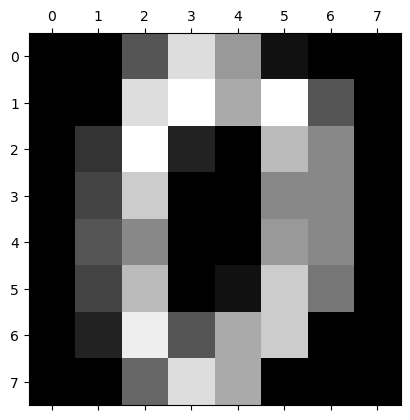

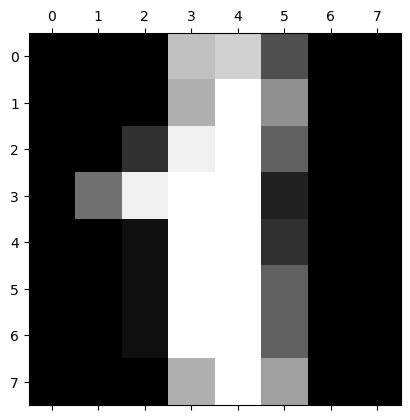

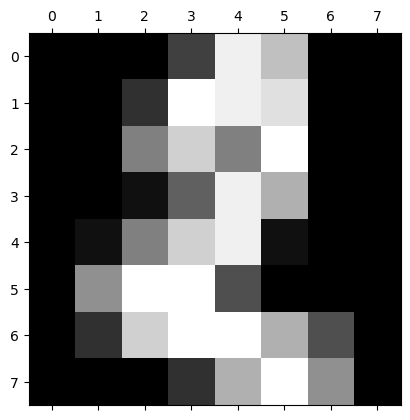

In [112]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(3):
    plt.matshow(data.images[i])
plt.show()

We randomly split this data into training (80\%) and test (20\%) partitions. This can be done with:

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

❓ Run your implementation of the multi-class perceptron algorithm on this dataset. Measure the training and test accuracy. 

0.9527777777777777

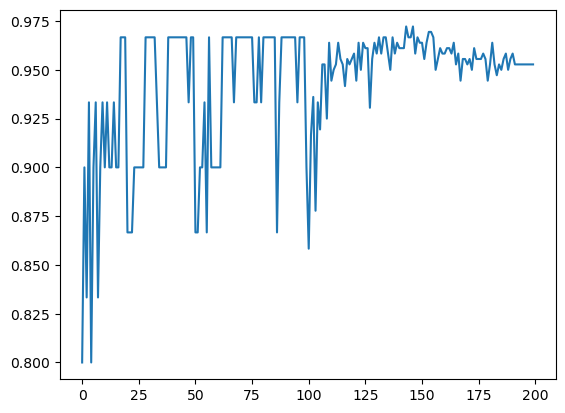

In [114]:
for i in range(100):
    W = multi_class_perceptron_epoch(X_train, y_train, W, 1)
    predicted_labels = multi_class_classify(X_test, W)
    acc = np.append(acc, accuracy(y_test, predicted_labels))
plt.plot(acc)
acc[-1]

Let's use `scikit-learn`'s implementation of the perceptron algorithm. You can check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to understand what hyperparameters they are using and why the performances are different

In [115]:
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=False, shuffle=False)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9735560194850382
0.9583333333333334
